# Explortory Data Analysis
#### this will show us how we can do EDA using python

# Three important points you need to keep in mind
-  Understanding data
-  Clean the data
-  Find a relationship between data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ks = sns.load_dataset('titanic')

In [6]:
ks.to_csv('kashti.csv')

In [7]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
# see dataset
ks.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
# see tail
ks.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [10]:
# see shape
ks.shape

(891, 15)

In [12]:
# how to see numeric information of dataset
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# unique values
ks.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [14]:
# columns name
ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [17]:
ks['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [22]:
ks[['sex', 'age', 'who', 'adult_male']].nunique()


sex            2
age           88
who            3
adult_male     2
dtype: int64

## Cleaning and filtring the data

In [25]:
# find missing values inside
ks.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [27]:
# removing missing values column(cleaning data)
# drop column[deck] because it has more missing values
ks_clean = ks.drop(['deck'], axis=1)
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [28]:
# checking null values
ks_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [29]:
ks_clean.shape

(891, 14)

In [30]:
# remove missing values in dataframe
ks_clean=ks_clean.dropna()

In [31]:
ks_clean.shape

(712, 14)

In [32]:
ks_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [34]:
ks_clean['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

In [35]:
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
ks_clean.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [37]:
ks_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='age'>

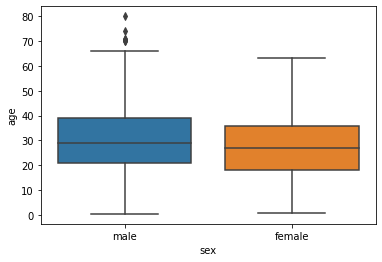

In [39]:
sns.boxplot(x='sex',y='age',data=ks_clean)

<AxesSubplot:ylabel='age'>

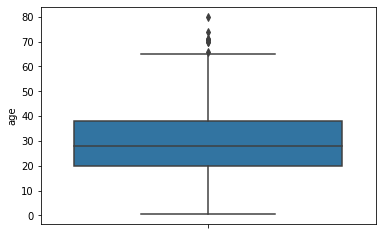

In [40]:
sns.boxplot(y='age',data=ks_clean)


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

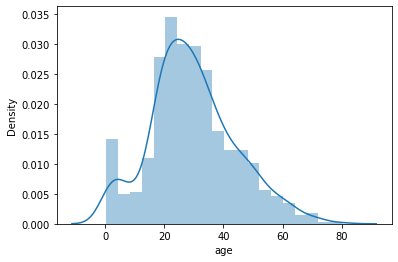

In [42]:
sns.distplot(ks_clean['age'])


In [44]:
# outliers removal
ks_clean['age'].mean()
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [67]:
ks_clean=ks_clean[ks_clean['age']<69]
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [68]:
ks_clean.shape

(687, 14)

In [69]:
ks_clean['age'].mean()

28.347409024745268

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

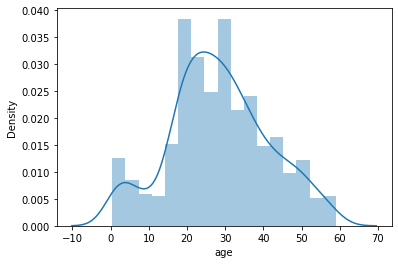

In [70]:
sns.distplot(ks_clean['age'])


<AxesSubplot:ylabel='age'>

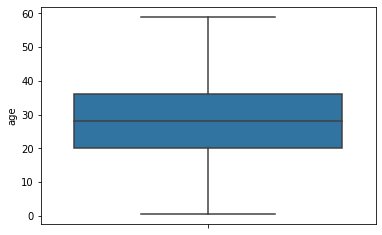

In [71]:
sns.boxplot(y='age',data=ks_clean)


<AxesSubplot:>

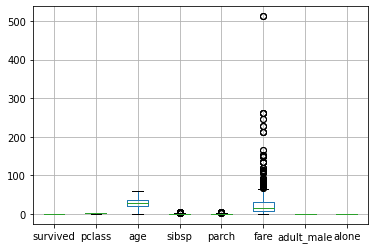

In [72]:
ks_clean.boxplot()

<AxesSubplot:>

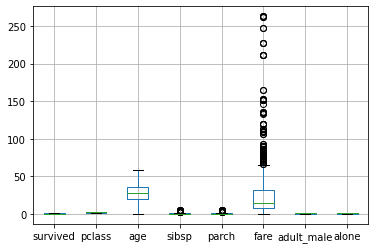

In [73]:
ks_clean=ks_clean[ks_clean['fare']<300]
ks_clean.boxplot()

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

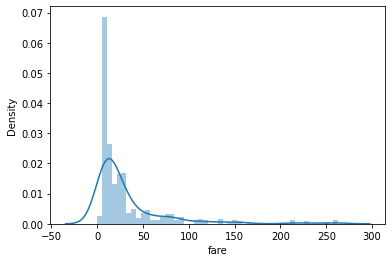

In [74]:
sns.distplot(ks_clean['fare'])

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

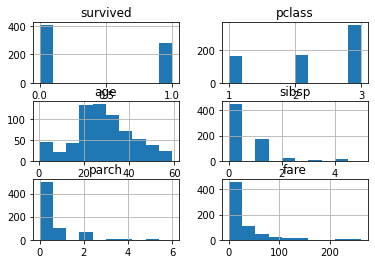

In [76]:
ks_clean.hist()

<AxesSubplot:>

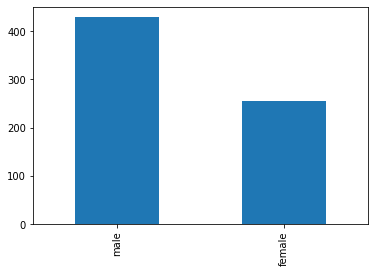

In [77]:
pd.value_counts(ks_clean['sex']).plot.bar()

In [78]:
ks_clean.groupby(['sex','class']).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.962500     1.0  33.550000  0.550000  0.525000  104.373699   
       Second  0.918919     2.0  28.722973  0.500000  0.621622   21.951070   
       Third   0.455446     3.0  21.341584  0.831683  0.960396   15.937625   
male   First   0.423529     1.0  37.440235  0.411765  0.305882   63.216519   
       Second  0.147368     2.0  29.319263  0.378947  0.242105   21.260000   
       Third   0.152610     3.0  25.847068  0.497992  0.261044   12.239556   

               adult_male     alone  
sex    class                         
female First     0.000000  0.362500  
       Second    0.000000  0.405405  
       Third     0.000000  0.366337  
male   First     0.964706  0.505882  
       Second    0.905263  0.631579  
       Third     0.887550  0.734940

#### Relationship

In [79]:
corr_ks_clean = ks_clean.corr()

<AxesSubplot:>

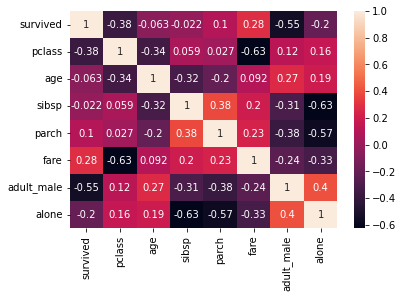

In [82]:
sns.heatmap(corr_ks_clean,annot=True)

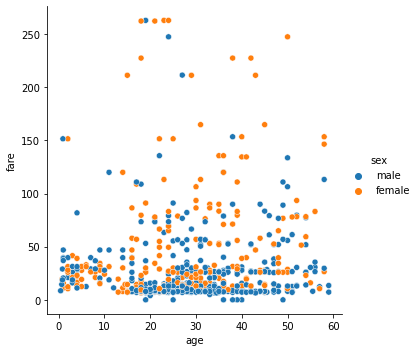

In [84]:
sns.relplot(x='age',y='fare',hue='sex',data=ks_clean)

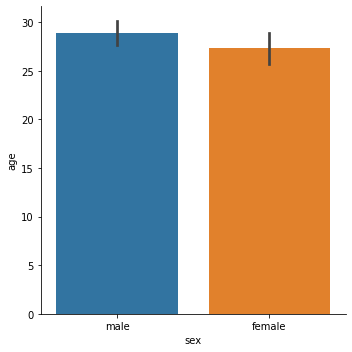

In [87]:
sns.catplot(x='sex',y='age',data=ks_clean,kind='bar')

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


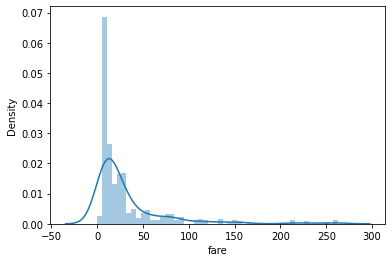

In [88]:
# log transformation
sns.distplot(ks_clean['fare'])
ks_clean['fare_log']=np.log(ks_clean['fare'])

In [89]:
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


<AxesSubplot:ylabel='fare'>

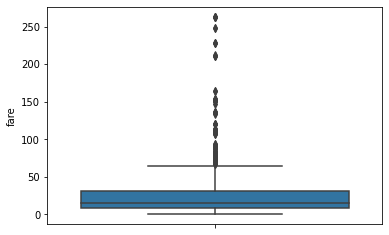

In [92]:
sns.boxplot(y='fare',data=ks_clean)

<AxesSubplot:ylabel='fare_log'>

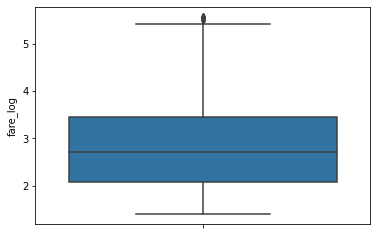

In [93]:
sns.boxplot(y='fare_log',data=ks_clean)

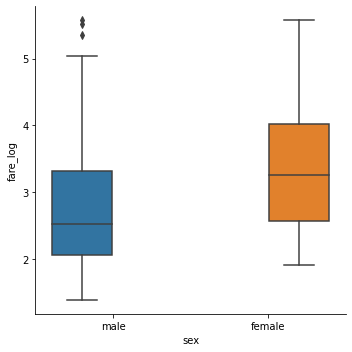

In [94]:
sns.catplot(x='sex',y='fare_log',hue='sex',data=ks_clean,kind='box')